In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [4]:
df = df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)

In [5]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

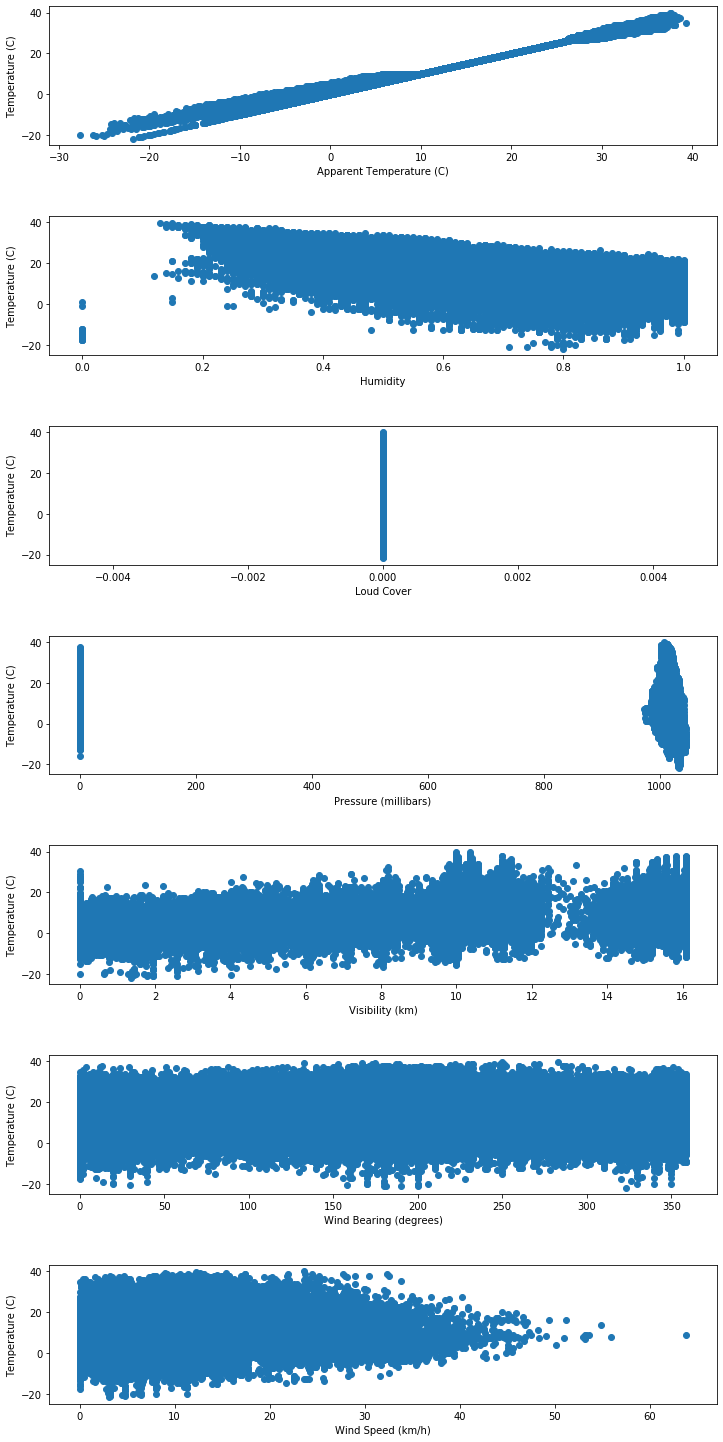

In [6]:
X = df[df.columns.difference(['Temperature (C)'])]
y = df['Temperature (C)']
fig, axis = plt.subplots(X.shape[1], 1)
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

for i, feature in enumerate(X.columns.tolist()):
    axis[i].scatter(df[feature], y)
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel('Temperature (C)')

In [7]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [8]:
X = df[['Visibility (km)']]
y = df['Temperature (C)']

### Divide the dataset into training and test sets with the ratio 80:20.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Implement a function fit_ridge_regression

In [11]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """

    data_vector['ones'] = 1
    data_vector = data_vector[['ones', 'Visibility (km)']]
    
    beta = np.linalg.inv(data_vector.T.dot(data_vector) + l * np.eye(2)).dot(data_vector.T).dot(response_vector)
    return beta

### Implement a function fit_polynomial_regression

In [12]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    poly_df = pd.DataFrame()
    
    for d in range(0, degree + 1):
        poly_df[d] = data_vector['Visibility (km)'] ** d
        
    beta = np.linalg.inv(poly_df.T.dot(poly_df)).dot(poly_df.T).dot(response_vector)
    
    return beta

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

In [18]:
poly_train_beta = fit_polynomial_regression(X_train, y_train, 3)
ridge_train_beta = fit_ridge_regression(X_train, y_train)
poly_test_beta = fit_polynomial_regression(X_test, y_test, 3)
ridge_test_beta = fit_ridge_regression(X_test, y_test)

/home/gayane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


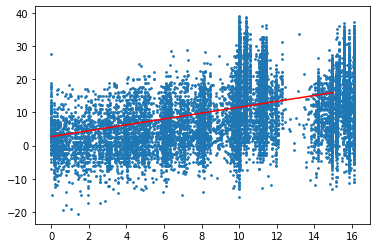

In [28]:
curve_x = np.arange(0,16)
curve_y = [ridge_test_beta[0] + ridge_test_beta[1]*x for x in curve_x]
plt.plot(curve_x, curve_y, color='red')
plt.scatter(X_test['Visibility (km)'], y_test, s=3)

### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [33]:
squared_error = np.sqrt(sum((y - sum(ridge_test_beta[i] * x ** i for i in range(len(ridge_test_beta)))) ** 2
                        for x, y in zip(X_train['Visibility (km)'], y_train)) / len(X_train))
print('linear regression train RMSE: ', squared_error)

linear regression train RMSE:  8.770646824513646


### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(np.array(X_train['Visibility (km)']).reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)

y_test_predict = poly_model.predict(poly_features.fit_transform(np.array(X_test['Visibility (km)']).reshape(-1, 1)))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print(rmse_test, rmse_train)

8.30933219403796 8.245005322284387


### Use any additional visualizations that may help during your analysis.

In [38]:
def plot_fitted_line(beta,
                     x,
                     y):

    curve_x = np.arange(0,16)
    curve_y = [beta[0] + beta[1]*x for x in curve_x]
    plt.plot(curve_x, curve_y, color='red')
    plt.scatter(x,y,color='k')
    plt.show()
    
plot_fitted_line(poly_train_beta, X_train, y_t)